# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [59]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [60]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_0.5sec.csv')

In [61]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,2.773985,0.954402,-0.159601,1.891269,-1.390175,0.250992,2.314484,-0.5,0.6,0.9
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,-5.631022,-1.942915,0.316453,-3.736031,2.862457,-0.505018,-4.604725,-0.5,0.6,0.9
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,3.019717,1.029735,-0.283431,2.059147,-1.224844,0.062533,2.929292,-0.5,0.6,0.9
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,-2.220555,1.330794,0.299717,-1.717227,1.356485,0.381643,-2.760077,-0.5,0.6,0.9
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,3.369063,-3.021065,-0.032345,2.294503,-2.909980,-0.303837,3.050193,-0.5,0.6,0.9


## Feature Selection

In [62]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_0.5sec.csv')

In [63]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,0.817623,-1.301589,0.262907,2.773985,0.954402,-0.159601,1.891269,-1.390175,0.250992,2.314484
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,-1.699018,2.604534,-0.525487,-5.631022,-1.942915,0.316453,-3.736031,2.862457,-0.505018,-4.604725
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,2.059971,-1.093538,0.288001,3.019717,1.029735,-0.283431,2.059147,-1.224844,0.062533,2.929292
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,-2.892520,2.339856,-0.074563,-2.220555,1.330794,0.299717,-1.717227,1.356485,0.381643,-2.760077
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,2.581226,-5.387246,0.025001,3.369063,-3.021065,-0.032345,2.294503,-2.909980,-0.303837,3.050193


### Variance Analysis

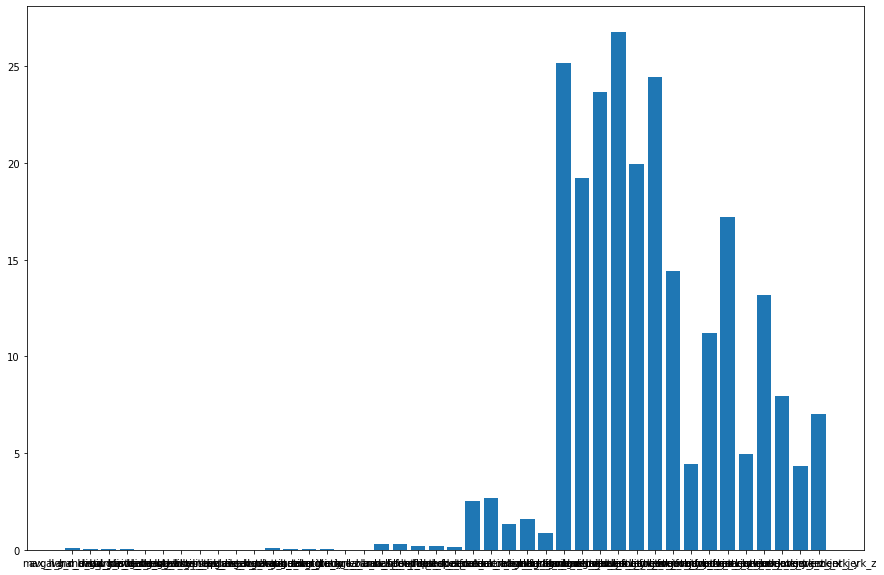

max_hand_distance  -  0.08480639560528568
avg_l_hand_hip_distance  -  0.028408478514667344
avg_r_hand_hip_distance  -  0.03049258129277315
max_stride_length  -  0.034631680265633714
avg_l_hand_chest_distance  -  0.013623843146293719
avg_r_hand_chest_distance  -  0.013290026203150108
avg_l_elbow_hip_distance  -  0.006961883515492963
avg_r_elbow_hip_distance  -  0.006847716702997597
avg_chest_pelvis_distance  -  4.2540651916006077e-19
avg_neck_chest_distance  -  1.4290338031689881e-05
avg_neck_rotation_w  -  0.012462942423224323
avg_neck_rotation_x  -  0.10691163123854142
avg_neck_rotation_y  -  0.023023865230520732
avg_neck_rotation_z  -  0.06506008687519811
avg_total_body_volume  -  0.04305113786926224
avg_triangle_area_hands_neck  -  0.003733899827046558
avg_triangle_area_feet_hips  -  0.0036562913248120252
l_hand_speed  -  0.28633513344434725
r_hand_speed  -  0.3033718043867771
l_foot_speed  -  0.19051673701628186
r_foot_speed  -  0.2211137265286524
neck_speed  -  0.13881439630322012

In [64]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [65]:
data = pd.read_csv('datasets/DANCE_WALK_KIN_0.5sec.csv')

In [66]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,0.817623,-1.301589,0.262907,2.773985,0.954402,-0.159601,1.891269,-1.390175,0.250992,2.314484
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,-1.699018,2.604534,-0.525487,-5.631022,-1.942915,0.316453,-3.736031,2.862457,-0.505018,-4.604725
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,2.059971,-1.093538,0.288001,3.019717,1.029735,-0.283431,2.059147,-1.224844,0.062533,2.929292
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,-2.892520,2.339856,-0.074563,-2.220555,1.330794,0.299717,-1.717227,1.356485,0.381643,-2.760077
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,2.581226,-5.387246,0.025001,3.369063,-3.021065,-0.032345,2.294503,-2.909980,-0.303837,3.050193


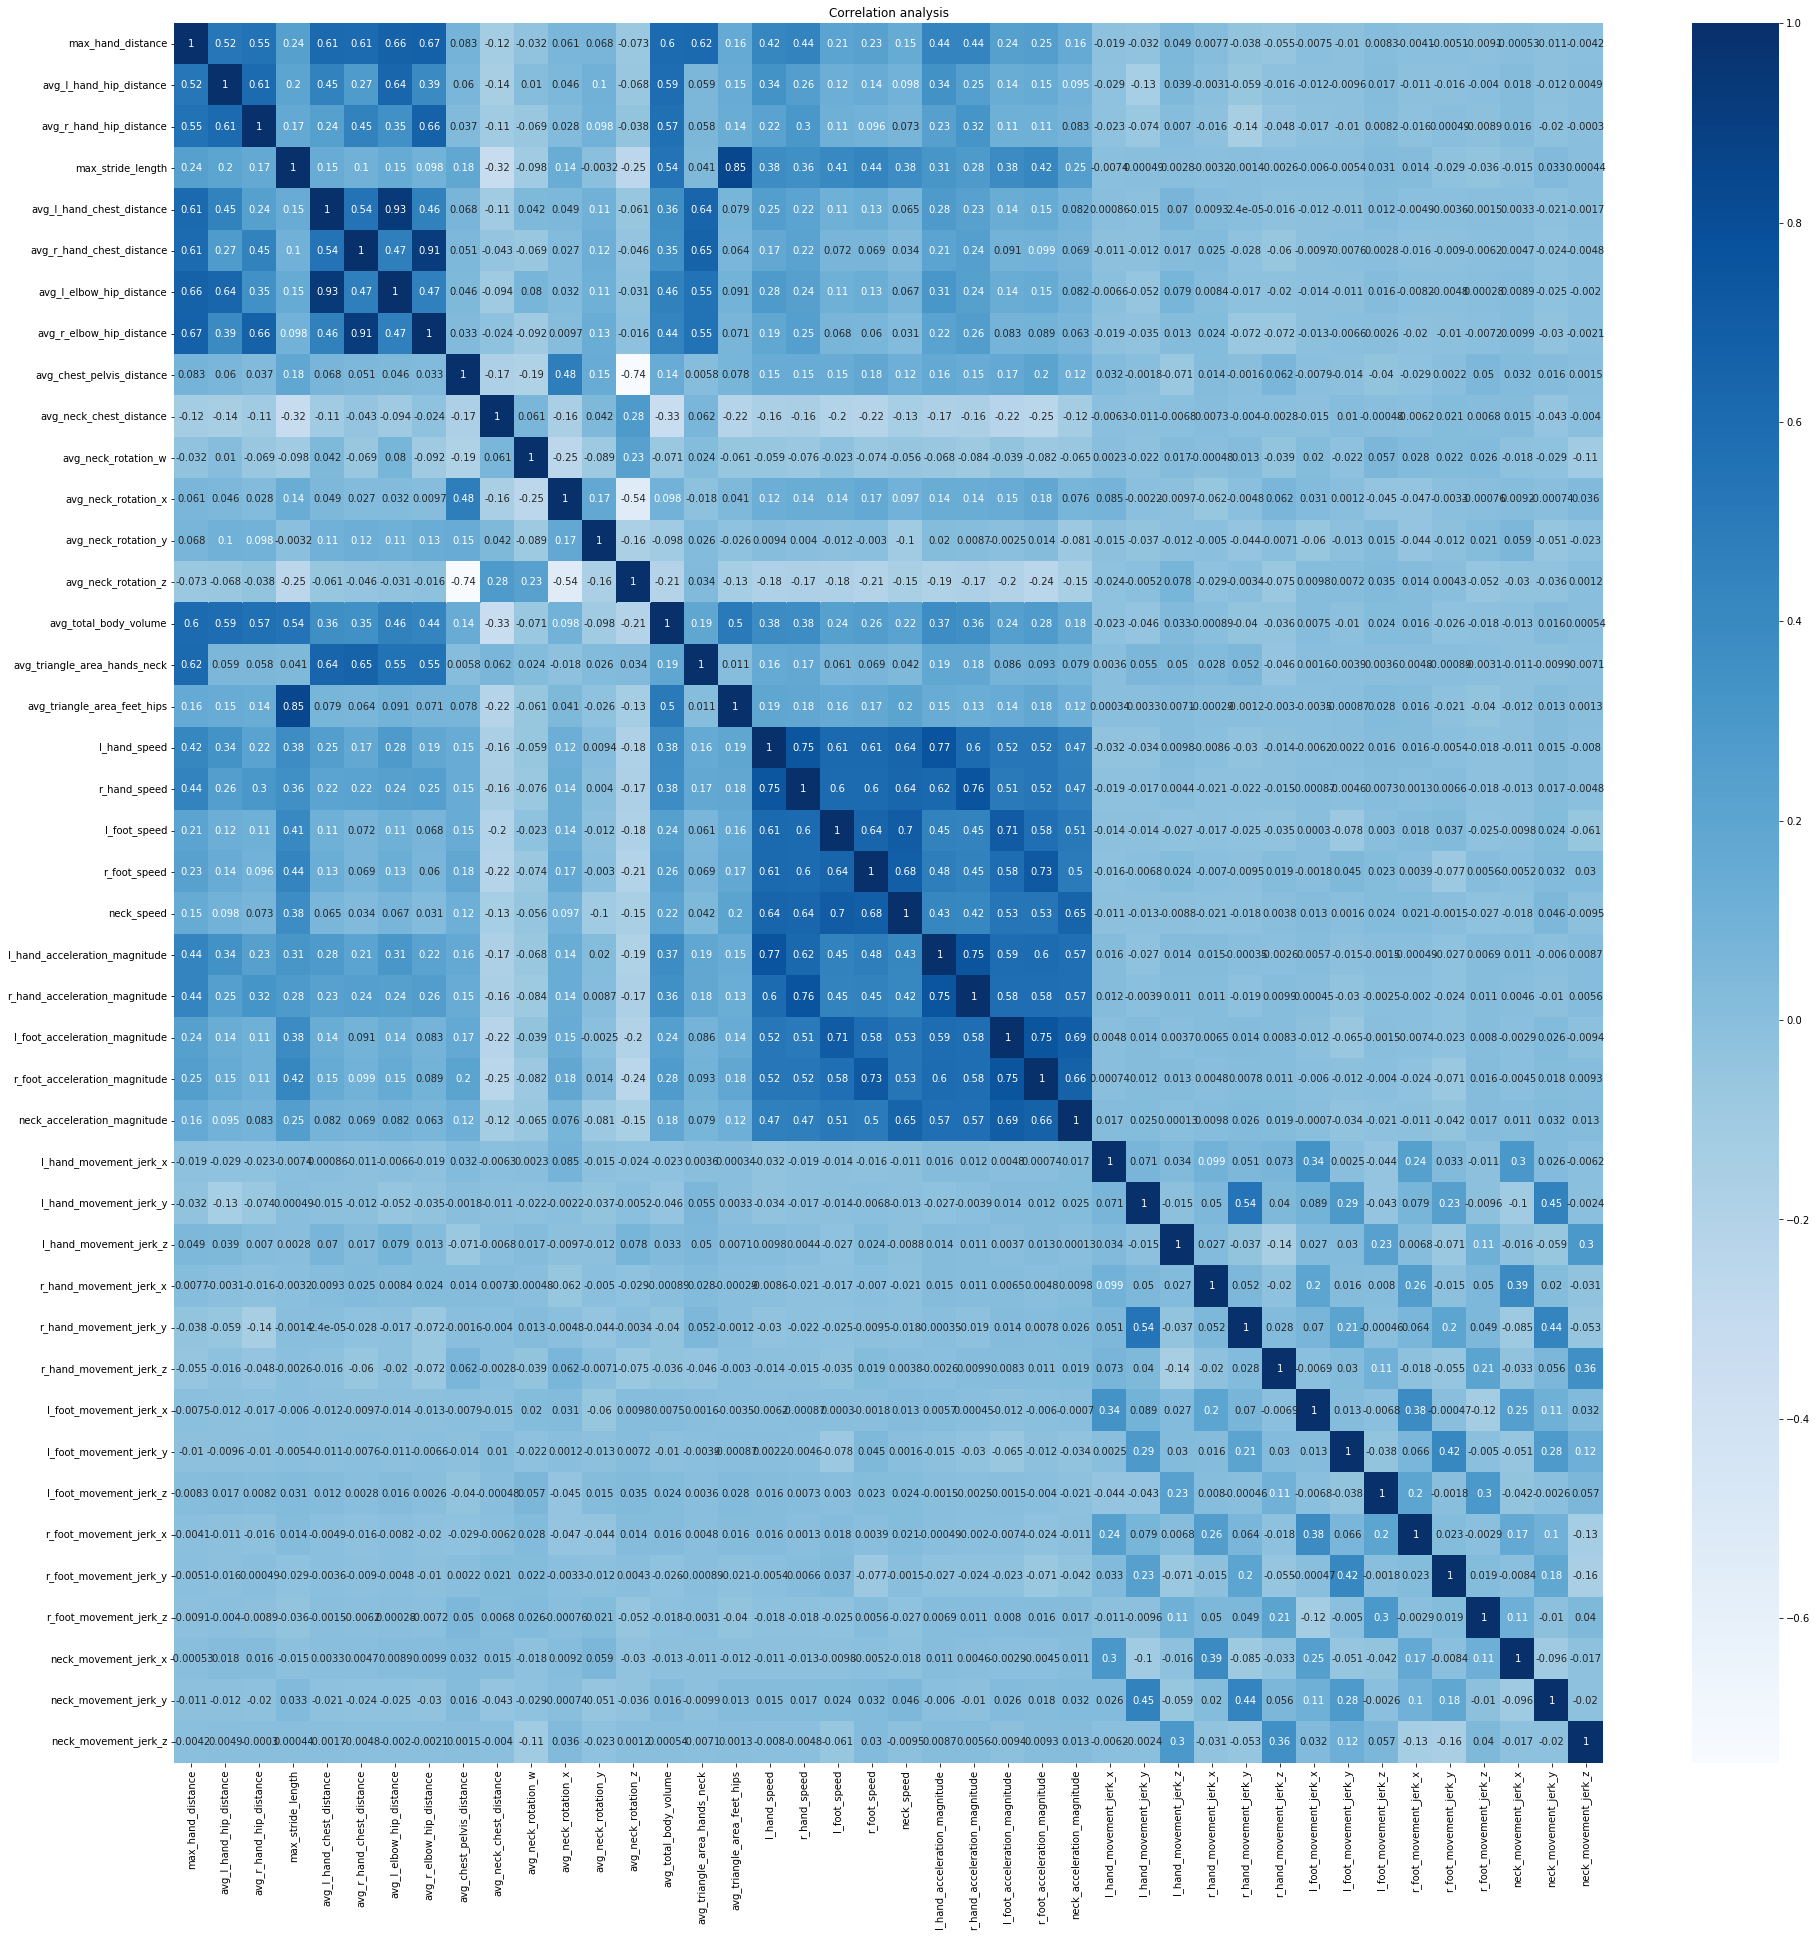

In [67]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [68]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [69]:
df = pd.read_csv('datasets/DANCE_WALK_KIN_0.5sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.280297
avg_l_hand_hip_distance          0.258841
avg_r_hand_hip_distance          0.219039
max_stride_length                0.236090
avg_l_hand_chest_distance        0.196771
avg_r_hand_chest_distance        0.155675
avg_l_elbow_hip_distance         0.206018
avg_r_elbow_hip_distance         0.160261
avg_chest_pelvis_distance        0.137568
avg_neck_chest_distance          0.150832
avg_neck_rotation_w              0.047525
avg_neck_rotation_x              0.082075
avg_neck_rotation_y              0.094798
avg_neck_rotation_z              0.166484
avg_total_body_volume            0.269771
avg_triangle_area_hands_neck     0.068788
avg_triangle_area_feet_hips      0.116894
l_hand_speed                     0.301231
r_hand_speed                     0.279169
l_foot_speed                     0.205542
r_foot_speed                     0.218193
neck_speed                       0.125503
l_hand_acceleration_ma

In [70]:
X = X.drop(columns=[
    "l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
    "r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
    "l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
    "r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
    "neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
    'avg_neck_rotation_w', 'avg_neck_rotation_x', 'avg_neck_rotation_z',
    'l_hand_acceleration_magnitude', 'r_hand_acceleration_magnitude', 'l_foot_acceleration_magnitude', 'r_foot_acceleration_magnitude',
    'neck_acceleration_magnitude'
])

In [71]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/Fs2_DANCE_WALK_KIN_0.5sec.csv', index = False)

In [72]:
data = pd.read_csv('datasets/Fs2_DANCE_WALK_KIN_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_triangle_area_hands_neck,avg_triangle_area_feet_hips,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,EMOTION_P,EMOTION_A,EMOTION_D
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,0.151735,0.118982,0.554922,0.383167,0.768857,0.531111,0.677884,-0.5,0.6,0.9
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,0.148052,0.124862,0.014111,0.016391,0.020766,0.014436,0.021416,-0.5,0.6,0.9
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,0.138617,0.132826,0.609370,0.553874,0.056692,0.072819,0.191442,-0.5,0.6,0.9
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,0.133927,0.173824,0.764245,0.762294,0.848961,0.464108,0.605356,-0.5,0.6,0.9
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,0.109949,0.208755,0.169733,0.269697,0.168320,0.139125,0.207208,-0.5,0.6,0.9


## Data Balancing

In [73]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_0.5sec.csv')
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,-1.301589,0.262907,2.773985,0.954402,-0.159601,1.891269,-1.390175,0.250992,2.314484,angry
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,2.604534,-0.525487,-5.631022,-1.942915,0.316453,-3.736031,2.862457,-0.505018,-4.604725,angry
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,-1.093538,0.288001,3.019717,1.029735,-0.283431,2.059147,-1.224844,0.062533,2.929292,angry
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,2.339856,-0.074563,-2.220555,1.330794,0.299717,-1.717227,1.356485,0.381643,-2.760077,angry
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,-5.387246,0.025001,3.369063,-3.021065,-0.032345,2.294503,-2.909980,-0.303837,3.050193,angry


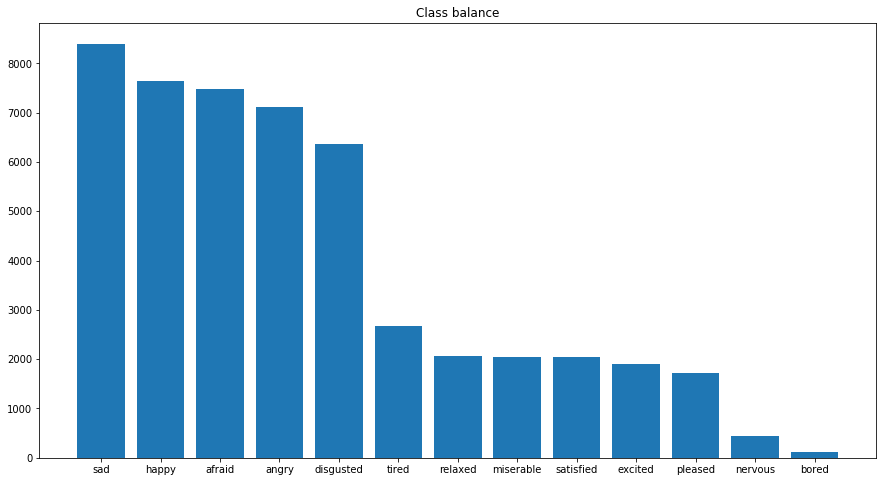

Minority class: 114
Majority class: 7468
Proportion: 0.02 : 1.0


In [74]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=7104 (14.214%)
Class=happy, n=7640 (15.287%)
Class=sad, n=8398 (16.803%)
Class=disgusted, n=6364 (12.734%)
Class=afraid, n=7468 (14.943%)
Class=excited, n=1900 (3.802%)
Class=tired, n=2680 (5.362%)
Class=pleased, n=1718 (3.438%)
Class=satisfied, n=2042 (4.086%)
Class=bored, n=114 (0.228%)
Class=relaxed, n=2064 (4.130%)
Class=miserable, n=2046 (4.094%)
Class=nervous, n=440 (0.880%)


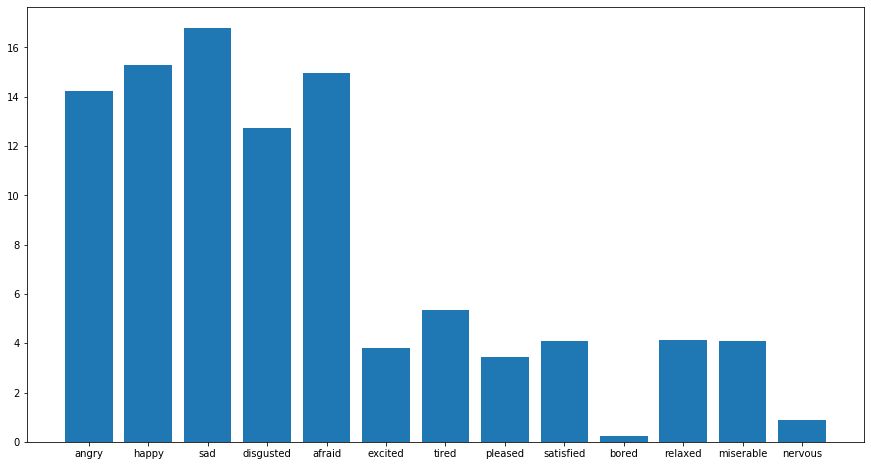

In [77]:
data = pd.read_csv('datasets/labels/DANCE_WALK_KIN_0.5sec.csv')


values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (8.188%)
Class=angry, n=1000 (8.188%)
Class=bored, n=28 (0.229%)
Class=disgusted, n=1000 (8.188%)
Class=excited, n=474 (3.881%)
Class=happy, n=1000 (8.188%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)
Class=pleased, n=428 (3.504%)
Class=relaxed, n=513 (4.200%)
Class=sad, n=1000 (8.188%)
Class=satisfied, n=509 (4.168%)
Class=tired, n=667 (5.461%)


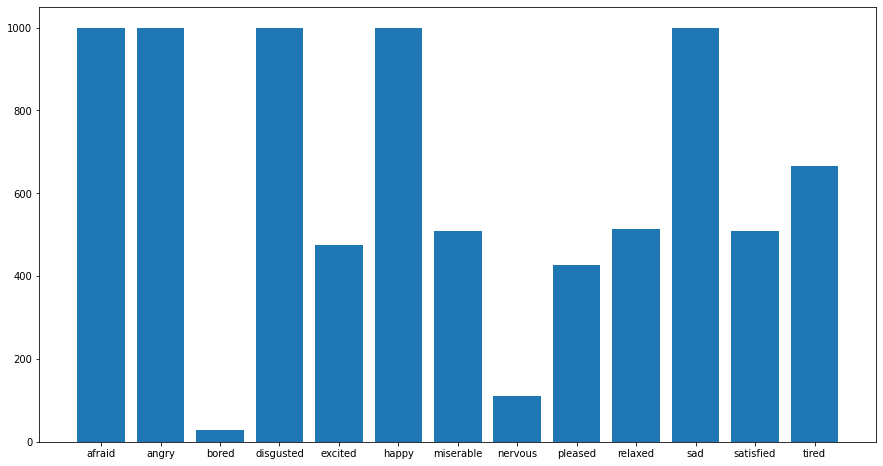

In [128]:
#strategy = {"angry":339, "happy": 400, "sad": 338, "afraid": 385, "pleased": 400, "bored": 28, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 110}
strategy = {"angry":1000,"disgusted":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 428, "bored": 28, "tired": 667, "relaxed": 513, "excited": 474, "miserable": 509, "satisfied": 509, "nervous": 110}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=600 (7.692%)
Class=angry, n=600 (7.692%)
Class=bored, n=600 (7.692%)
Class=disgusted, n=600 (7.692%)
Class=excited, n=600 (7.692%)
Class=happy, n=600 (7.692%)
Class=miserable, n=600 (7.692%)
Class=nervous, n=600 (7.692%)
Class=pleased, n=600 (7.692%)
Class=relaxed, n=600 (7.692%)
Class=sad, n=600 (7.692%)
Class=satisfied, n=600 (7.692%)
Class=tired, n=600 (7.692%)


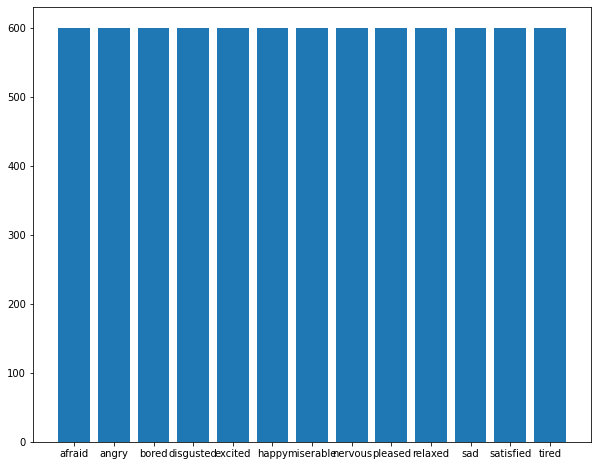

In [111]:
#strategy = {"angry":400, "happy": 400, "sad": 400, "afraid": 400, "pleased": 400, "bored": 400, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 400}
strategy = {"angry":600, "happy": 600, "sad": 600, "afraid": 600, "pleased": 600, "bored": 600, "tired": 600, "relaxed": 600, "excited": 600, "miserable": 600, "satisfied": 600, "nervous": 600, "disgusted": 600}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [75]:
conv_dict = {
    "angry": (-0.5, 0.6, 0.9),
    "happy": (0.6, 0.5, 0.2),
    "sad": (-0.6, -0.3, -0.3),
    "disgusted": (-0.4, 0.25, -0.1) ,
    "afraid": (-0.35, 0.7, -0.8),
    "pleased": (0.7, 0.2, 0.2),
    "bored": (-0.5, -0.7, -0.25),
    "tired": (0.1, -0.7, -0.2),
    "relaxed": (0.6, -0.55, 0.1),
    "excited": (0.5, 0.7, 0.4),
    "miserable": (-0.85, -0.1, -0.8),
    "nervous": (-0.3, -0.66, -0.7),
    "satisfied": (0.9, -0.25, 0.65),   
}

In [78]:
header = ["max_hand_distance",
          "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance",
          "max_stride_length",
          "avg_l_hand_chest_distance",
          "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance",
          "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance",
          "avg_neck_chest_distance",
          #"avg_neck_rotation_w", "avg_neck_rotation_x", 
          "avg_neck_rotation_y", 
          #"avg_neck_rotation_z",
          "avg_total_body_volume",
          "avg_triangle_area_hands_neck",
          "avg_triangle_area_feet_hips",
          
          "l_hand_speed",
          "r_hand_speed",
          "l_foot_speed",
          "r_foot_speed",
          "neck_speed",
          
          #"l_hand_acceleration_magnitude",
          #"r_hand_acceleration_magnitude",
          #"l_foot_acceleration_magnitude",
          #"r_foot_acceleration_magnitude",
          #"neck_acceleration_magnitude",
          
          #"l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
          #"r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
          #"l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
          #"r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
          #"neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
          
          "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ]

forbidden_index = [10,11,13, 22,23,24,25,26, 27,28,29,30, 31,32,33,34, 35,36,37,38, 39,40,41,42]

with open('datasets/Fs2_B_DANCE_WALK_KIN_0.5sec.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j in forbidden_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif(emotion == "neutral" or emotion == "bored" or emotion == "nervous"):
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])
        new_row.append(coordinates[2])

        writer.writerow(new_row)

In [80]:
data = pd.read_csv('datasets/Fs2_B_DANCE_WALK_KIN_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_triangle_area_hands_neck,avg_triangle_area_feet_hips,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,EMOTION_P,EMOTION_A,EMOTION_D
0,0.684605,0.268051,0.236534,0.478955,0.469381,0.455152,0.351238,0.336392,0.286151,0.278741,...,0.151735,0.118982,0.554922,0.383167,0.768857,0.531111,0.677884,-0.5,0.6,0.9
1,0.438911,0.265254,0.229588,0.283025,0.468163,0.452005,0.350459,0.333469,0.286151,0.278750,...,0.148052,0.124862,0.014111,0.016391,0.020766,0.014436,0.021416,-0.5,0.6,0.9
2,0.440199,0.266441,0.223630,0.309053,0.455287,0.439872,0.343657,0.325378,0.286151,0.278739,...,0.138617,0.132826,0.609370,0.553874,0.056692,0.072819,0.191442,-0.5,0.6,0.9
3,0.500120,0.386881,0.393727,0.452718,0.418828,0.440395,0.324313,0.340373,0.286151,0.278729,...,0.133927,0.173824,0.764245,0.762294,0.848961,0.464108,0.605356,-0.5,0.6,0.9
4,0.562528,0.447009,0.596923,0.488571,0.361697,0.522971,0.286162,0.430045,0.286151,0.278747,...,0.109949,0.208755,0.169733,0.269697,0.168320,0.139125,0.207208,-0.5,0.6,0.9


## Outliers

In [96]:
from scipy import stats

In [97]:
data = pd.read_csv('datasets/Fs2_B_DANCE_WALK_KIN_0.5sec.csv')
print(data.shape)

(49424, 22)


In [98]:
data.iloc[0]

max_hand_distance               0.684605
avg_l_hand_hip_distance         0.268051
avg_r_hand_hip_distance         0.236534
max_stride_length               0.478955
avg_l_hand_chest_distance       0.469381
avg_r_hand_chest_distance       0.455152
avg_l_elbow_hip_distance        0.351238
avg_r_elbow_hip_distance        0.336392
avg_chest_pelvis_distance       0.286151
avg_neck_chest_distance         0.278741
avg_neck_rotation_y            -0.065563
avg_total_body_volume           0.100081
avg_triangle_area_hands_neck    0.151735
avg_triangle_area_feet_hips     0.118982
l_hand_speed                    0.554922
r_hand_speed                    0.383167
l_foot_speed                    0.768857
r_foot_speed                    0.531111
neck_speed                      0.677884
EMOTION_P                      -0.500000
EMOTION_A                       0.600000
EMOTION_D                       0.900000
Name: 0, dtype: float64

In [99]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(42358, 22)

In [100]:
data.iloc[0]

max_hand_distance               0.684605
avg_l_hand_hip_distance         0.268051
avg_r_hand_hip_distance         0.236534
max_stride_length               0.478955
avg_l_hand_chest_distance       0.469381
avg_r_hand_chest_distance       0.455152
avg_l_elbow_hip_distance        0.351238
avg_r_elbow_hip_distance        0.336392
avg_chest_pelvis_distance       0.286151
avg_neck_chest_distance         0.278741
avg_neck_rotation_y            -0.065563
avg_total_body_volume           0.100081
avg_triangle_area_hands_neck    0.151735
avg_triangle_area_feet_hips     0.118982
l_hand_speed                    0.554922
r_hand_speed                    0.383167
l_foot_speed                    0.768857
r_foot_speed                    0.531111
neck_speed                      0.677884
EMOTION_P                      -0.500000
EMOTION_A                       0.600000
EMOTION_D                       0.900000
Name: 0, dtype: float64

In [101]:
data.to_csv(r'datasets/Fs2_B_O_DANCE_WALK_KIN_0.5sec.csv', index = False)